<a href="https://colab.research.google.com/github/JimenezHAnaFer/SIMULACION-1/blob/main/Ejercicio_19_05_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problema de flecha

Una flecha sera ensamblada en un cojinete como se muestra a continuación

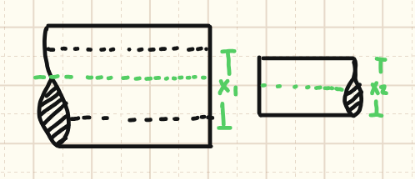

Si $x_1$ sigue una distribución normal con media de 1.5 y varianza 0.0016, $x_2$ sigue esta misma distribución con media 1.48 y varianza de 0.0009.

**Determinar**

a)Probabilidad dde interferencia

b)El N° de veces que es necesario hacer el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero de 0.01 con un nivel de seguridad del 95 %

#Solución

**Paso 1**


Identifique las variables

$$x_1 \sim N(1.5, 0.004)$$
$$x_1 \sim N(1.48, 0.03)$$


**Paso 2**

Determine la distribución de probabilidad


$$x_1 \sim f(x) = \frac{1}{(0.04)\sqrt{2\pi}} e^{-\frac{1}{2} \frac{(x-1.5)^2}{(0.04)^2}}$$

$$x_2 \sim f(x) = \frac{1}{(0.03)\sqrt{2\pi}} e^{-\frac{1}{2} \frac{(x-1.48)^2}{(0.03)^2}}$$

**Paso 3**

**Modelar las variables aleatorias**

Usaremos el metodo de **Box Müller**, ya que es más preciso y además entran dos variables y regresa dos variables lo que computacionalmete lo hace mejor.
Descartamos la opción de usar el método de las 12 uniformes ya que para crear una variables por experimento necesitamos 12 variables, lo cual computaionalmente es muy caro.

**Paso 4 (a)**

Definir el modelo y los objetivos de la simulación

1. Condición de interferencia:
$$x_2 \geq x_1$$

2. Buscamos que:
$$P(x_2\geq x_1)$$

**Paso 5**

Pseudocódigo:

\begin{aligned}
&\text{}  n  = 10 \\
&\text{Generar } x_1, x_2 \sim N(\mu,σ) \\
&\text{Si } x_2 \geq x_1  \\
&\text{Calcular la probabilidad de la forma }  \\
&\text{Suma de interferencias  } \text{exitos}/10
\end{aligned}

**Paso 6**

Repetir M veces el experimento

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from scipy.stats import norm

#Definir el experimento
x=1000
def experimento(x):
    exitos = 0
    for i in range(x):
        x1 = np.random.normal(1.5, 0.04,1)
        x2 = np.random.normal(1.48, 0.03,1)
        if x2 >= x1:
            exitos += 1
    prob = exitos / x
    return prob

#Realizar m experimentos para la muestra
m = 600

lista = []
for i in range(m):
    lista.append(experimento(i+1))


**Paso 7**

Determinar el tamaño de la muestra

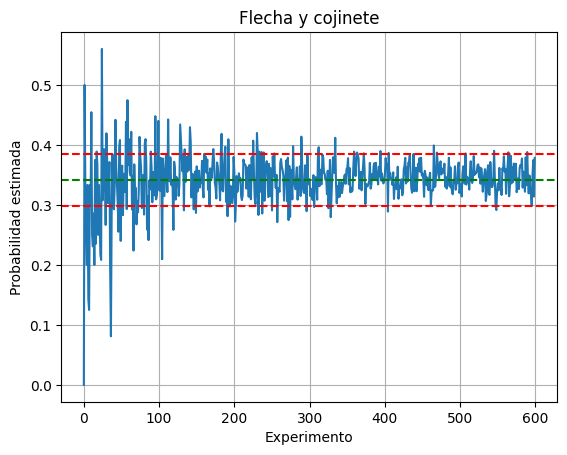

In [3]:
plt.plot(lista)
plt.xlabel('Experimento')
plt.ylabel('Probabilidad estimada')
plt.title('Flecha y cojinete')
plt.axhline(np.mean(lista)+np.std(lista), color='r', linestyle='--')
plt.axhline(np.mean(lista)-np.std(lista), color='r', linestyle='--')
plt.axhline(np.mean(lista), color='g', linestyle='--')
plt.grid(True)
plt.show()

In [4]:
print("La media es: ", np.mean(lista))
print("La varianza es: ", np.var(lista))
print("La desviación estándar es: ", np.std(lista))

La media es:  0.34183476805973567
La varianza es:  0.001870777703093994
La desviación estándar es:  0.04325248782548807


**Calculos teoricos**



Con diferencia de Distribuciones (ya que tenemos dos distribuciones normales)

Tenemos

$$\mu_1 = 1.5, \text{ } \sigma_1 = 0.04$$

$$\mu_2 = 1.48, \text{ } \sigma_2 = 0.03$$

Definimos $D$ como la diferencia

$$D = x_2 - x_1 $$

$$ \mu = \mu_2 - \mu_1 = 1.48 - 1.5 = -0.02$$

$$\sigma^2 = \sigma_1^2 + \sigma_2^2 = 0.0025$$

$$\sigma = 0.05$$

Por lo tanto tenemos:

$$X \sim N (-0.02, 0.05)$$

**Probabilidad**

$$P(x_2-x_1 \geq 0)= \int_0^{x_2-x_1}\frac{1}{\sqrt{2 \pi}\sigma}e^{-\frac{(t-\mu)^2}{2(\sigma)^2}}dx=0.3446 $$

In [5]:
from scipy.stats import norm

# Parámetros de la distribución
mu = -0.02
sigma = 0.05

# Cálculo de la probabilidad P(D >= 0)
probabilidad = 1 - norm.cdf(0, loc=mu, scale=sigma)

print(f"La probabilidad (interferencia) P(x2 - x1 >= 0) es: {probabilidad:.4f}")

La probabilidad (interferencia) P(x2 - x1 >= 0) es: 0.3446


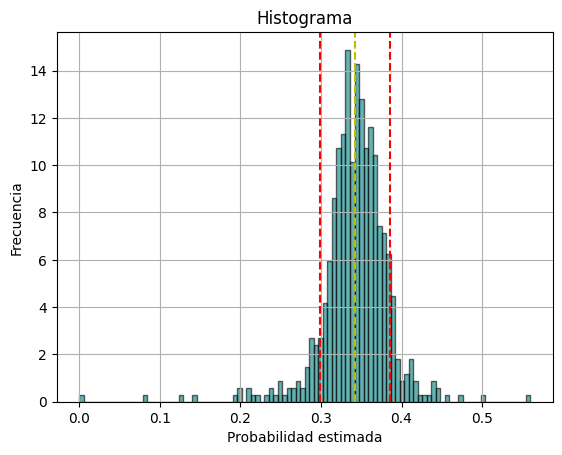

In [6]:
plt.hist(lista, bins=100, density=True, alpha=0.6, color='teal',edgecolor='black')
plt.axvline(np.mean(lista)+np.std(lista), color='r', linestyle='--')
plt.axvline(np.mean(lista)-np.std(lista), color='r', linestyle='--')
plt.axvline(np.mean(lista), color='y', linestyle='--')
plt.xlabel('Probabilidad estimada')
plt.ylabel('Frecuencia')
plt.title('Histograma')
plt.grid(True)
plt.show()

**Calculo del intervalo de confianza**

In [9]:
import math

# Definir el nivel de confianza y el valor z
confianza = 0.95
z = norm.ppf((1 + confianza) / 2) # Obtiene el valor z para el nivel de confianza

# Calcular el intervalo de confianza para la probabilidad (utilizando la distribución normal de la media muestral)
# Intervalo de confianza = media_muestral +/- z * (desviacion_estandar_muestral / sqrt(tamaño_muestra))
media_muestral = np.mean(lista)
desviacion_estandar_muestral = np.std(lista)
tamaño_muestra_actual = len(lista)

margen_error_ic = z * (desviacion_estandar_muestral / np.sqrt(tamaño_muestra_actual))
intervalo_inferior = media_muestral - margen_error_ic
intervalo_superior = media_muestral + margen_error_ic

print(f"El intervalo de confianza del {confianza*100}% para la probabilidad de interferencia es: [{intervalo_inferior:.4f}, {intervalo_superior:.4f}]")

El intervalo de confianza del 95.0% para la probabilidad de interferencia es: [0.3384, 0.3453]


**Calculo del rango aceptable**

In [10]:
margen_error_ra = 0.01
rango_inferior = media_muestral - margen_error_ra
rango_superior = media_muestral + margen_error_ra


print(f"El rango aceptable del {confianza*100}% para la probabilidad de interferencia es: [{rango_inferior:.4f}, {rango_superior:.4f}]")

El rango aceptable del 95.0% para la probabilidad de interferencia es: [0.3318, 0.3518]


**Paso 4 (b)**

Determinar el número de veces necesario $N$ para realizar el experimento si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en máximo 0.01, con un nivel de confianza del 95%.

**Paso 5**

Pseudocódigo:

1. error $= 0.01$

2. confianza $= 0.95$

3. $z =1.96$    valor para 95% confianza

4. calcular probabilidad teorica

5. Realizar N experimentos

6. Mostrar resultados


**Paso 6**

Cálculo del Tamaño de Muestra $N$

1. Fórmula para $N$:

$$N \geq (\frac{z}{E})^2p(1-p) $$

Donde

$z= 1.95$ (para 95% confianza)

$E=0.01$

$p \approx$  Valor teórico o una estimación conservadora ($p=0.5$ maximiza $N$)

$$N \geq (\frac{1.96}{0.01})^2(0.25) \approx 9506$$

In [11]:
error_maximo = 0.01
confianza = 0.95

#Cálculo de n necesario (fórmula estadística)
z = norm.ppf((1 + confianza)/2)
n_necesario = int((z**2 * probabilidad * (1 - probabilidad)) / (error_maximo**2)) + 1

prob_estimada = experimento(n_necesario)
diferencia = abs(prob_estimada - probabilidad)


print('Experimentos necesarios:', n_necesario)
print('Probabilidad estimada:', prob_estimada)
print('Diferencia:', diferencia)
print('¿Cumple con el error?','Sí' if diferencia <= error_maximo else 'No')


Experimentos necesarios: 8676
Probabilidad estimada: 0.3450899031811895
Diferencia: 0.0005116447915136657
¿Cumple con el error? Sí
